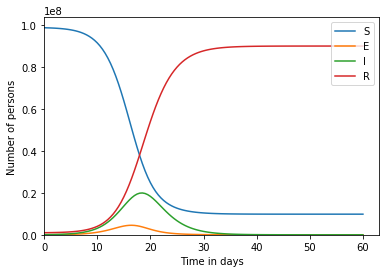

In [12]:
import numpy;
import matplotlib;
import matplotlib.pyplot;

h = 0.5 # days
transmission_coeff = 5e-9 # 1 / day person
latency_time = 1. # days
infectious_time = 5. # days

end_time = 60.0 # days
num_steps = int(end_time / h)
times = h * numpy.array(range(num_steps + 1))

def seir_model():
    s = numpy.zeros(num_steps + 1)
    e = numpy.zeros(num_steps + 1)
    i = numpy.zeros(num_steps + 1)
    r = numpy.zeros(num_steps + 1)

    s[0] = 1e8 - 1e6 - 1e5
    e[0] = 0.
    i[0] = 1e5
    r[0] = 1e6

    for step in range(num_steps):
        ###Your code here.
        
        ###Your code here.
        s2e = h * transmission_coeff * s[step] * i[step] 
        e2i = h * (1/latency_time) * e[step]
        i2r = h * (1/infectious_time) * i[step]
        
        s[step+1] = s[step] - s2e 
        e[step+1] = e[step] + s2e - e2i
        i[step+1] = i[step] + e2i - i2r 
        r[step+1] = r[step] + i2r
        
    return s, e, i, r

s, e, i, r = seir_model()

#@show_plot
def plot_me():
    s_plot = matplotlib.pyplot.plot(times, s, label = 'S')
    e_plot = matplotlib.pyplot.plot(times, e, label = 'E')
    i_plot = matplotlib.pyplot.plot(times, i, label = 'I')
    r_plot = matplotlib.pyplot.plot(times, r, label = 'R')
    matplotlib.pyplot.legend(('S', 'E', 'I', 'R'), loc = 'upper right')
    
    axes = matplotlib.pyplot.gca()
    axes.set_xlabel('Time in days')
    axes.set_ylabel('Number of persons')
    matplotlib.pyplot.xlim(xmin = 0.)
    matplotlib.pyplot.ylim(ymin = 0.)
    
plot_me()


